<a href="https://colab.research.google.com/github/MijulSaxena/EDA-project-on-Gooogle-playstore./blob/main/Play_Store_App_Review_Analysis_Capstone_Project_by_Mijul_Saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [49]:
# importing numpy, pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Extract the data of google playstore

In [51]:
play_store_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [52]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [53]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [54]:
# checking random data 
play_store_data.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
246,"MailChimp - Email, Marketing Automation",BUSINESS,4.1,5448,12M,"500,000+",Free,0,Everyone,Business,"July 25, 2018",4.9.1,5.0 and up
7965,CV Builder,BUSINESS,3.8,203,5.9M,"10,000+",Free,0,Everyone,Business,"September 30, 2016",2.2.1.0,2.3 and up
2893,Camera ZOOM FX - FREE,PHOTOGRAPHY,4.0,88860,6.1M,"5,000,000+",Free,0,Everyone,Photography,"April 6, 2017",6.2.9,2.3 and up
9419,EI App 1,FAMILY,NaN,0,13M,10+,Free,0,Everyone,Education,"November 23, 2017",1.0.4,4.1 and up
9381,Endress+Hauser Operations,BUSINESS,4.5,234,3.4M,"10,000+",Free,0,Everyone,Business,"April 16, 2018",2.4.3.1523,4.0 and up
7137,CB Pay,FINANCE,4.5,198,11M,"10,000+",Free,0,Everyone,Finance,"July 9, 2018",1.8.0,4.4 and up
3632,MyRadar NOAA Weather Radar,WEATHER,4.5,178934,Varies with device,"10,000,000+",Free,0,Everyone,Weather,"August 4, 2018",Varies with device,Varies with device
2369,Tarascon Pharmacopoeia,MEDICAL,4.4,275,5.8M,"10,000+",Free,0,Everyone 10+,Medical,"March 16, 2018",3.16.4.1669,4.4 and up
4434,Drink-O-Tron The Drinking Game,GAME,4.1,140,45M,"50,000+",Free,0,Mature 17+,Card,"May 31, 2017",1.64,4.0.3 and up
1184,Pastry & Cooking (Without Net),FOOD_AND_DRINK,4.7,6118,Varies with device,"1,000,000+",Free,0,Everyone,Food & Drink,"July 7, 2018",Varies with device,Varies with device


##**Data Cleaning and Preperation of dataset**

In [55]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking dulpicates in App column 

In [56]:
#checking duplicates in app column through value_counts(which returns the frequency)
play_store_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [57]:
#Removing the duplicate items
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [58]:
play_store_data.shape

(9660, 13)

In [59]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


##I observed that some columns are not that relevant also not responsible for app engagement and success like last updated date, current version, android version and Reviews:

In [60]:
# we can drop all those irrelevent data
play_store_data.drop(['Last Updated',	'Current Ver',	'Android Ver', 'Reviews'], axis = 1, inplace = True)

In [61]:
play_store_data.shape

(9660, 9)

## I have successfully removed the irrelevant data. Now, dealing with null values.

In [62]:
# checking for null values in play store data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1463
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

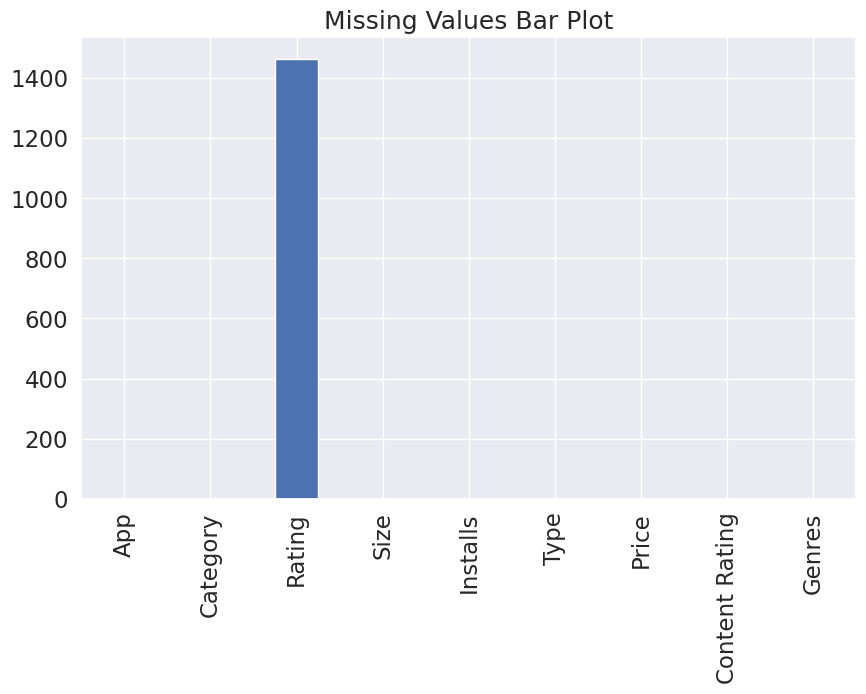

In [63]:
# create a bar plot of missing values using pandas and matplotlib
plt.figure(figsize=(10,6))
play_store_data.isnull().sum().plot(kind='bar')
plt.title("Missing Values Bar Plot")
plt.show()

In [64]:
# Since there is only one missing value in Content Rating and Type column. According to my observation it is best to drop them :
play_store_data.dropna(subset = ['Content Rating', 'Type'], inplace=True)

<Axes: >

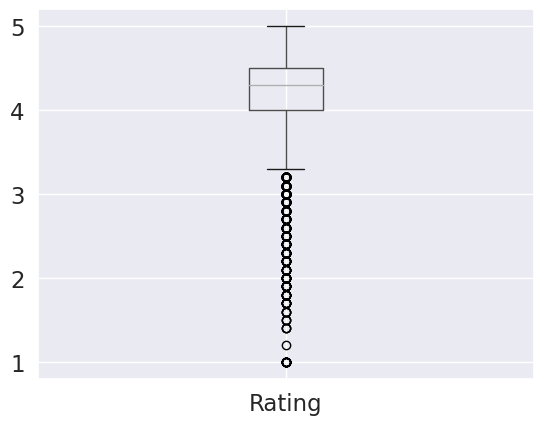

In [65]:
play_store_data.boxplot()

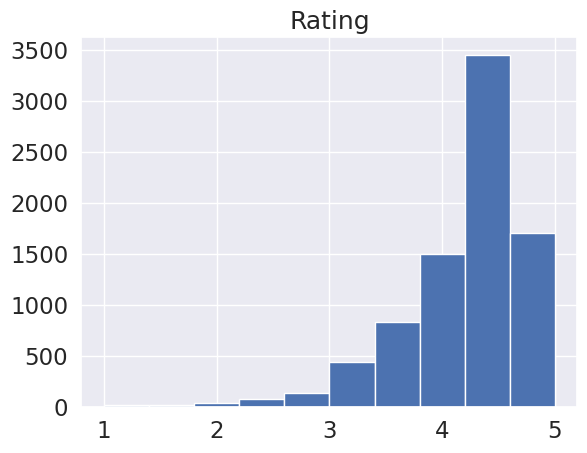

In [66]:
play_store_data.hist();

We can see Rating column has so many outliers and missing values. So, we can't drop all the null values. Instead we can fill all the null values with either mode or median. 

In [67]:
# Rating column filling the null values with mode in rating column
mode_of_ratings = play_store_data['Rating'].mode()
play_store_data['Rating'].fillna(play_store_data['Rating'].mode()[0], inplace = True)

In [68]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

There is no null value left

In [69]:
play_store_data.shape

(9658, 9)

In [70]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Size            9658 non-null   object 
 4   Installs        9658 non-null   object 
 5   Type            9658 non-null   object 
 6   Price           9658 non-null   object 
 7   Content Rating  9658 non-null   object 
 8   Genres          9658 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.5+ KB


##**We can see from the above statement that columns like size, installs and price has object datatype instead of any numeric datatype. So, let's convert them into numeric datatype.**

In [71]:
play_store_data.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [72]:
# removing the ',' and '+' symbol from installs column
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.strip('+'))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.replace(',', ''))

In [73]:
play_store_data['Installs'] = play_store_data['Installs'].astype(int)

In [74]:
play_store_data.tail(10)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,9.8M,5000,Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.8,582k,100000,Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,619k,1000,Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,2.6M,500,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,4.3,9.6M,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,53M,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6M,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,9.5M,1000,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Varies with device,1000,Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,19M,10000000,Free,0,Everyone,Lifestyle


In [75]:
# converting KB to MB
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x))

In [76]:
# Remove the dollar sign and convert the Price column to float data type
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.strip('$'))
play_store_data['Price'] = play_store_data['Price'].astype(float)

In [77]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Size            8432 non-null   float64
 4   Installs        9658 non-null   int64  
 5   Type            9658 non-null   object 
 6   Price           9658 non-null   float64
 7   Content Rating  9658 non-null   object 
 8   Genres          9658 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 754.5+ KB


In [78]:
play_store_data.head(5)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


##**Exploratory Analysis and Visualization**

<ipython-input-79-e570bf024a61>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(play_store_data['Rating'], shade=True)


<Axes: xlabel='Rating', ylabel='Density'>

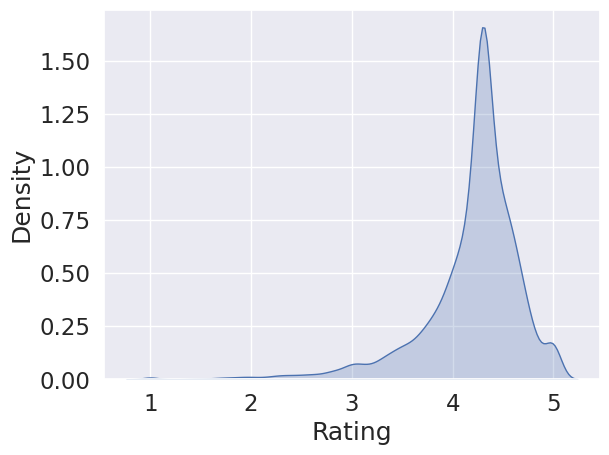

In [79]:
sns.kdeplot(play_store_data['Rating'], shade=True)

In [80]:
play_store_data.describe()

,Rating,Size,Installs,Price
count,9658.000000,8432.000000,9.658000e+03,9658.000000
mean,4.192431,20.395289,7.778312e+06,1.099413
std,0.496422,21.827542,5.376100e+07,16.853021
min,1.000000,0.008500,0.000000e+00,0.000000
25%,4.000000,4.600000,1.000000e+03,0.000000
50%,4.300000,12.000000,1.000000e+05,0.000000
75%,4.500000,28.000000,1.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,400.000000


<ipython-input-81-880aeab2c611>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(play_store_data.corr(), annot = True)


Text(0.5, 1.0, 'Correlation between colums')

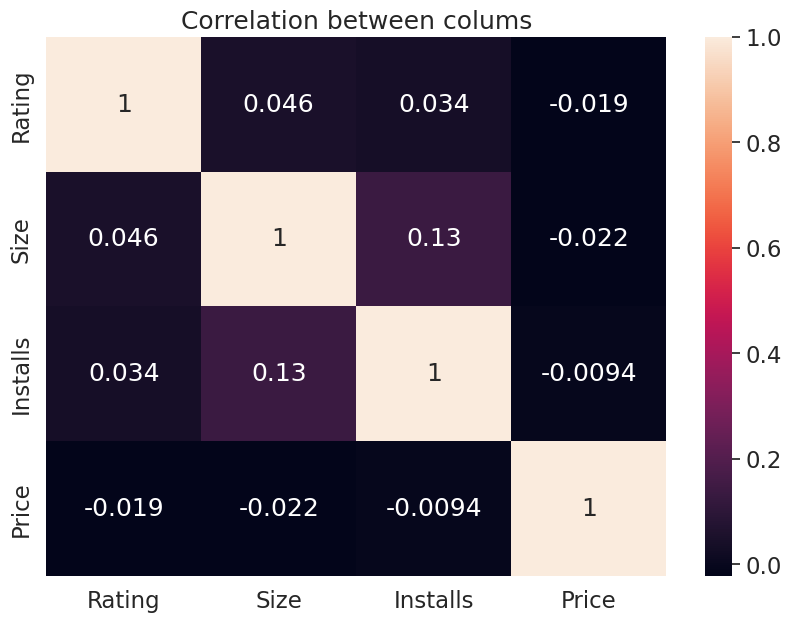

In [81]:
plt.figure(figsize = (10,7))
sns.heatmap(play_store_data.corr(), annot = True)
plt.title('Correlation between colums')



1. We can see the Price of the apps are negatively correlated  with rating, size and installs, which means price is the plays a major role in app success.
2. We can see positive corelation 


Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'EVENTS', 'ART_AND_DESIGN', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object')


<BarContainer object of 33 artists>

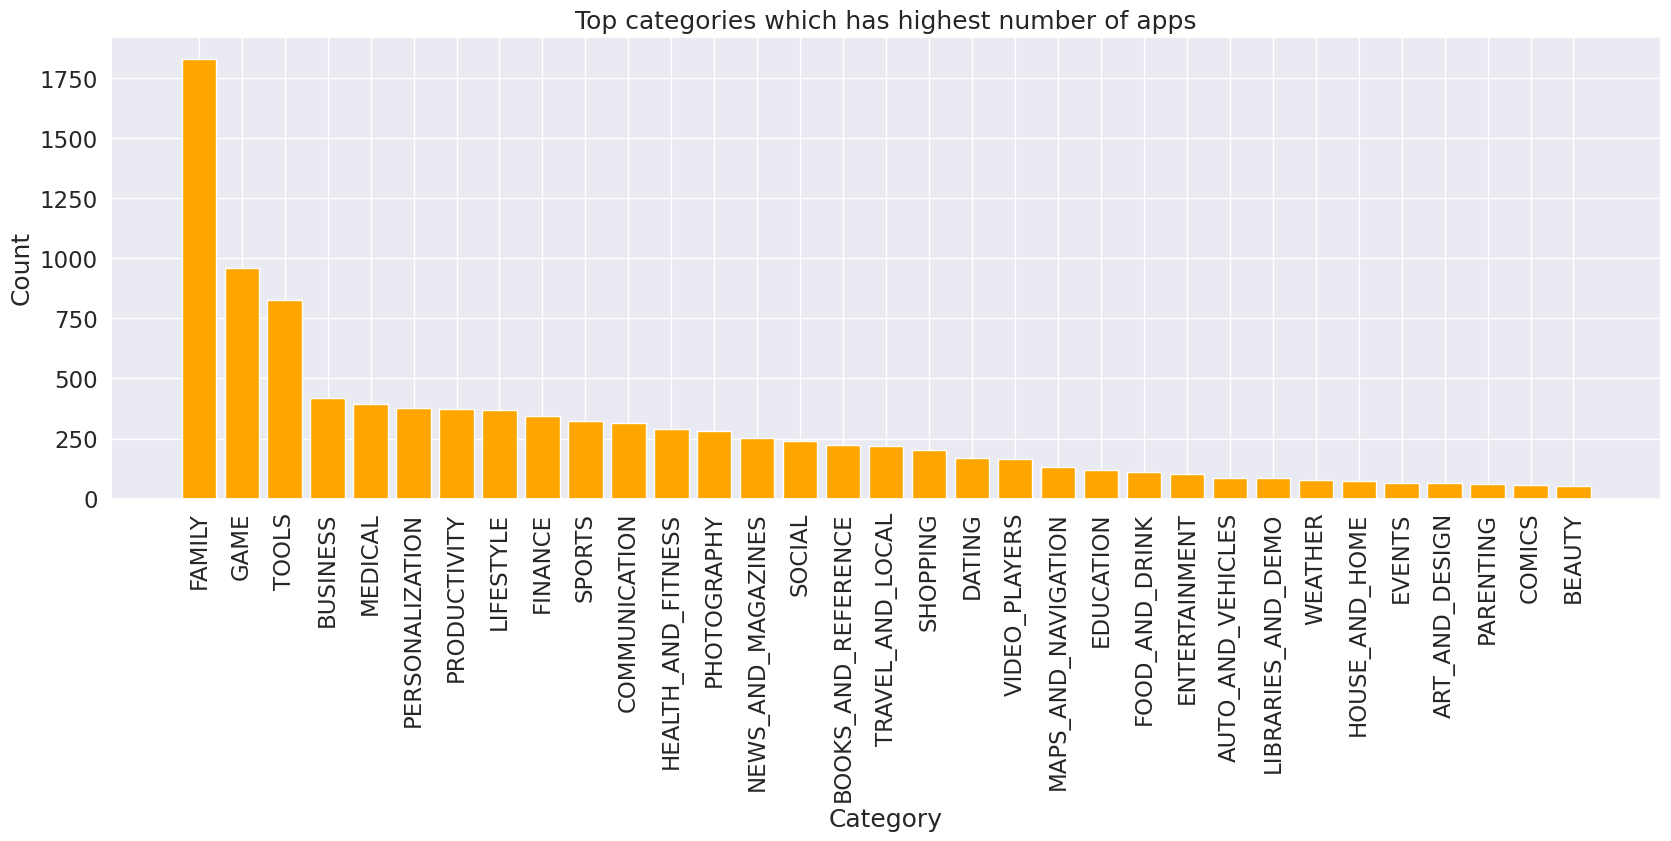

In [82]:
# Number of apps for each category
plt.figure(figsize=(20,6)) 
plt.xlabel("Category")
plt.ylabel("Count")
plt.title('Top categories which has highest number of apps')
plt.xticks(rotation=90)
y = play_store_data['Category'].value_counts()
x =  play_store_data['Category'].value_counts().index
print(x)
plt.bar(x,y, color = 'orange')

In [83]:
print(y)

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


We can see that family, games and tools categories has the highest number of apps in google play store. So, according to me demand of those category apps must be high. 
let's just check the number of installs in each category.

In [84]:
# total number of installs in each category
categories = play_store_data.groupby('Category')
category_total_installs = play_store_data.groupby('Category')[['Installs']].sum().reset_index()

<Axes: title={'center': 'Number of Installs In Each Category'}, xlabel='Category', ylabel='Installs'>

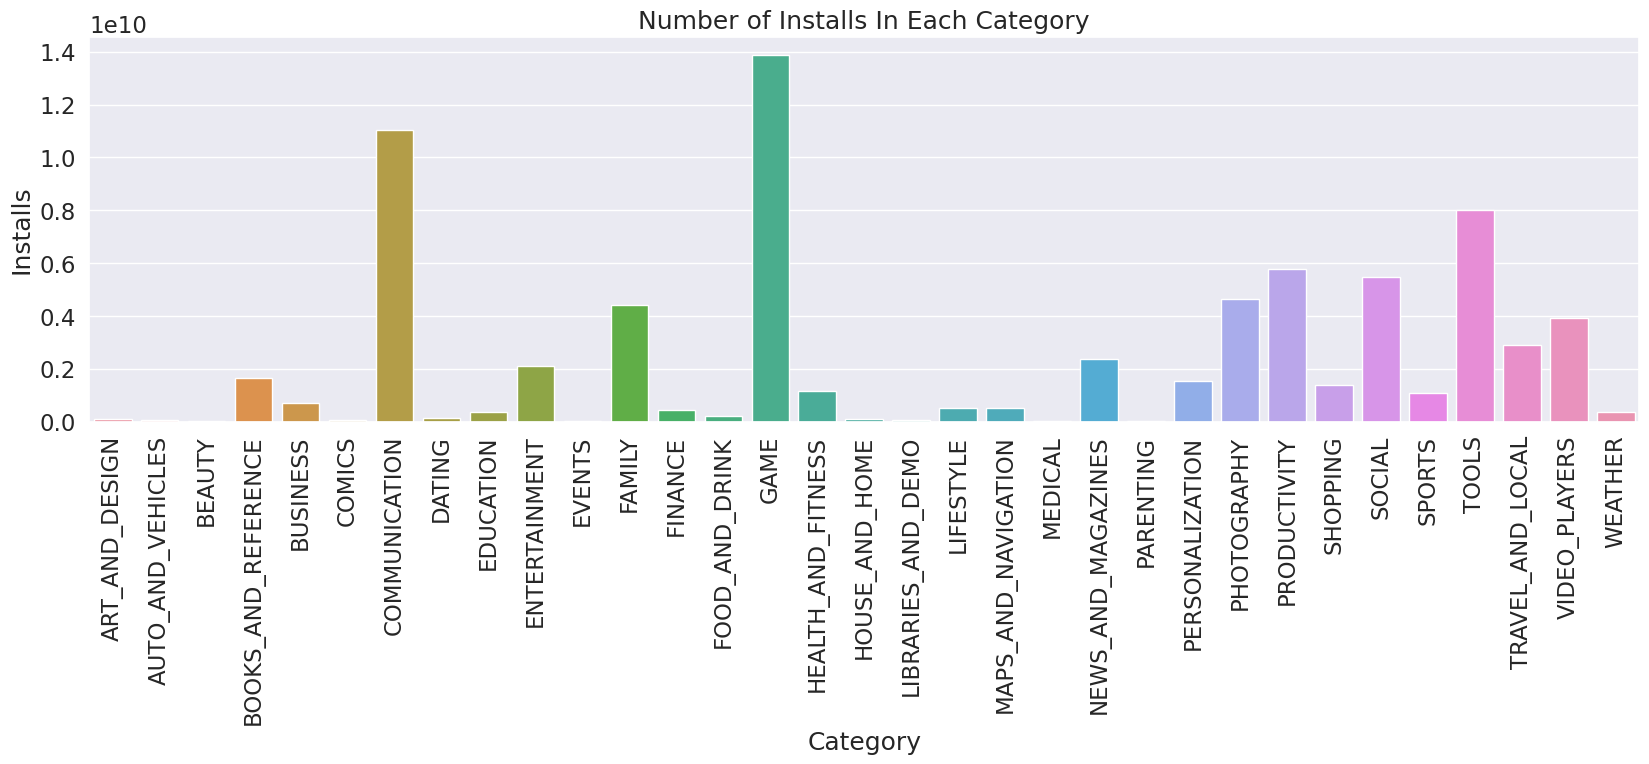

In [85]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Number of Installs In Each Category')
sns.barplot(x='Category', y='Installs', data = category_total_installs)

I thought family category has highest number of downloads cause it has highest number of apps available in play store but here games has highest number of downloads. On the other hand, i can see that gameing and tools category apps has hishest number of apps available as well as highest number of intalls. After checking the number of installs in each category, I can say that category is not that important factor for app success and engagement. But yes people are more intrested in gaming apps

---



In [86]:
# the count of applications in each category by their type
app_count = play_store_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [87]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

<ipython-input-87-0875c0ff96b4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


Text(0.5, 1.0, 'Count of applications in each category by their type')

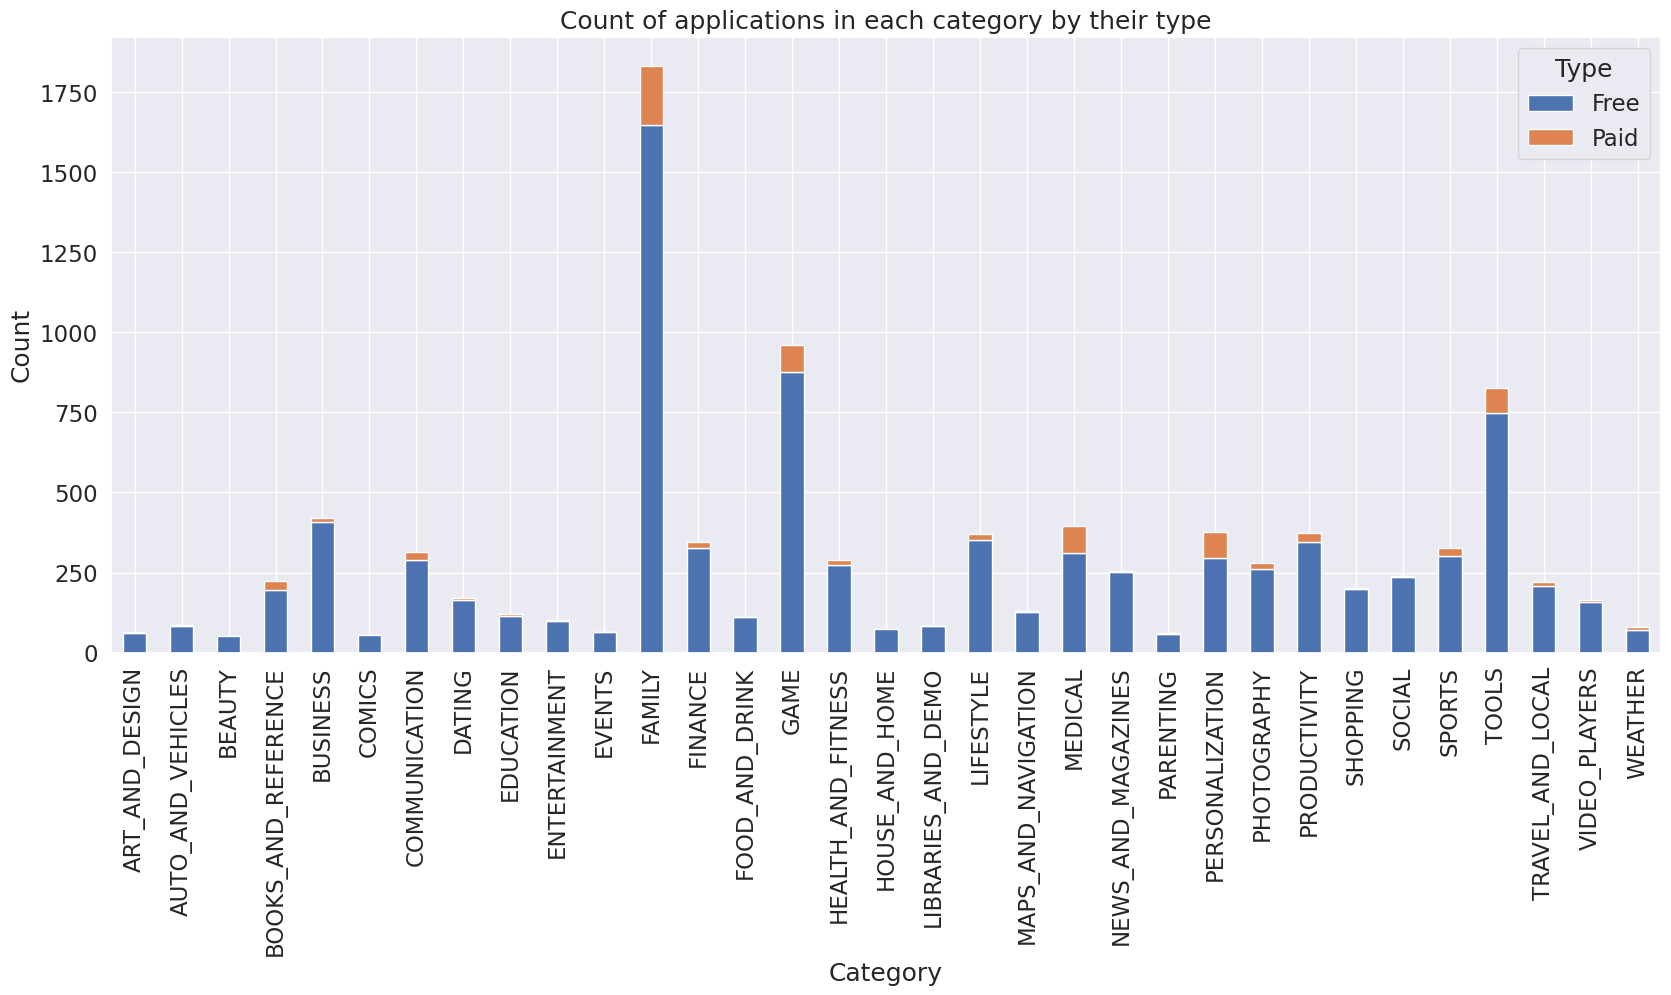

In [88]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(20,8))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of applications in each category by their type")

We can see paid apps are very less as compared with free.

Text(0.5, 1.0, 'Free v/s Paid apps present in app store')

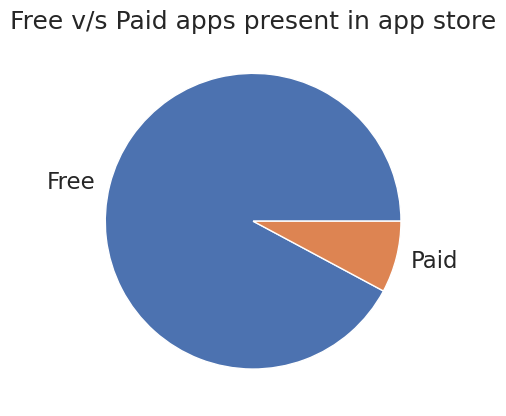

In [89]:
# Free v/s paid apps
labels = play_store_data['Type'].value_counts(sort = True).index
sizes = play_store_data['Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels)
plt.title('Free v/s Paid apps present in app store')

<BarContainer object of 118 artists>

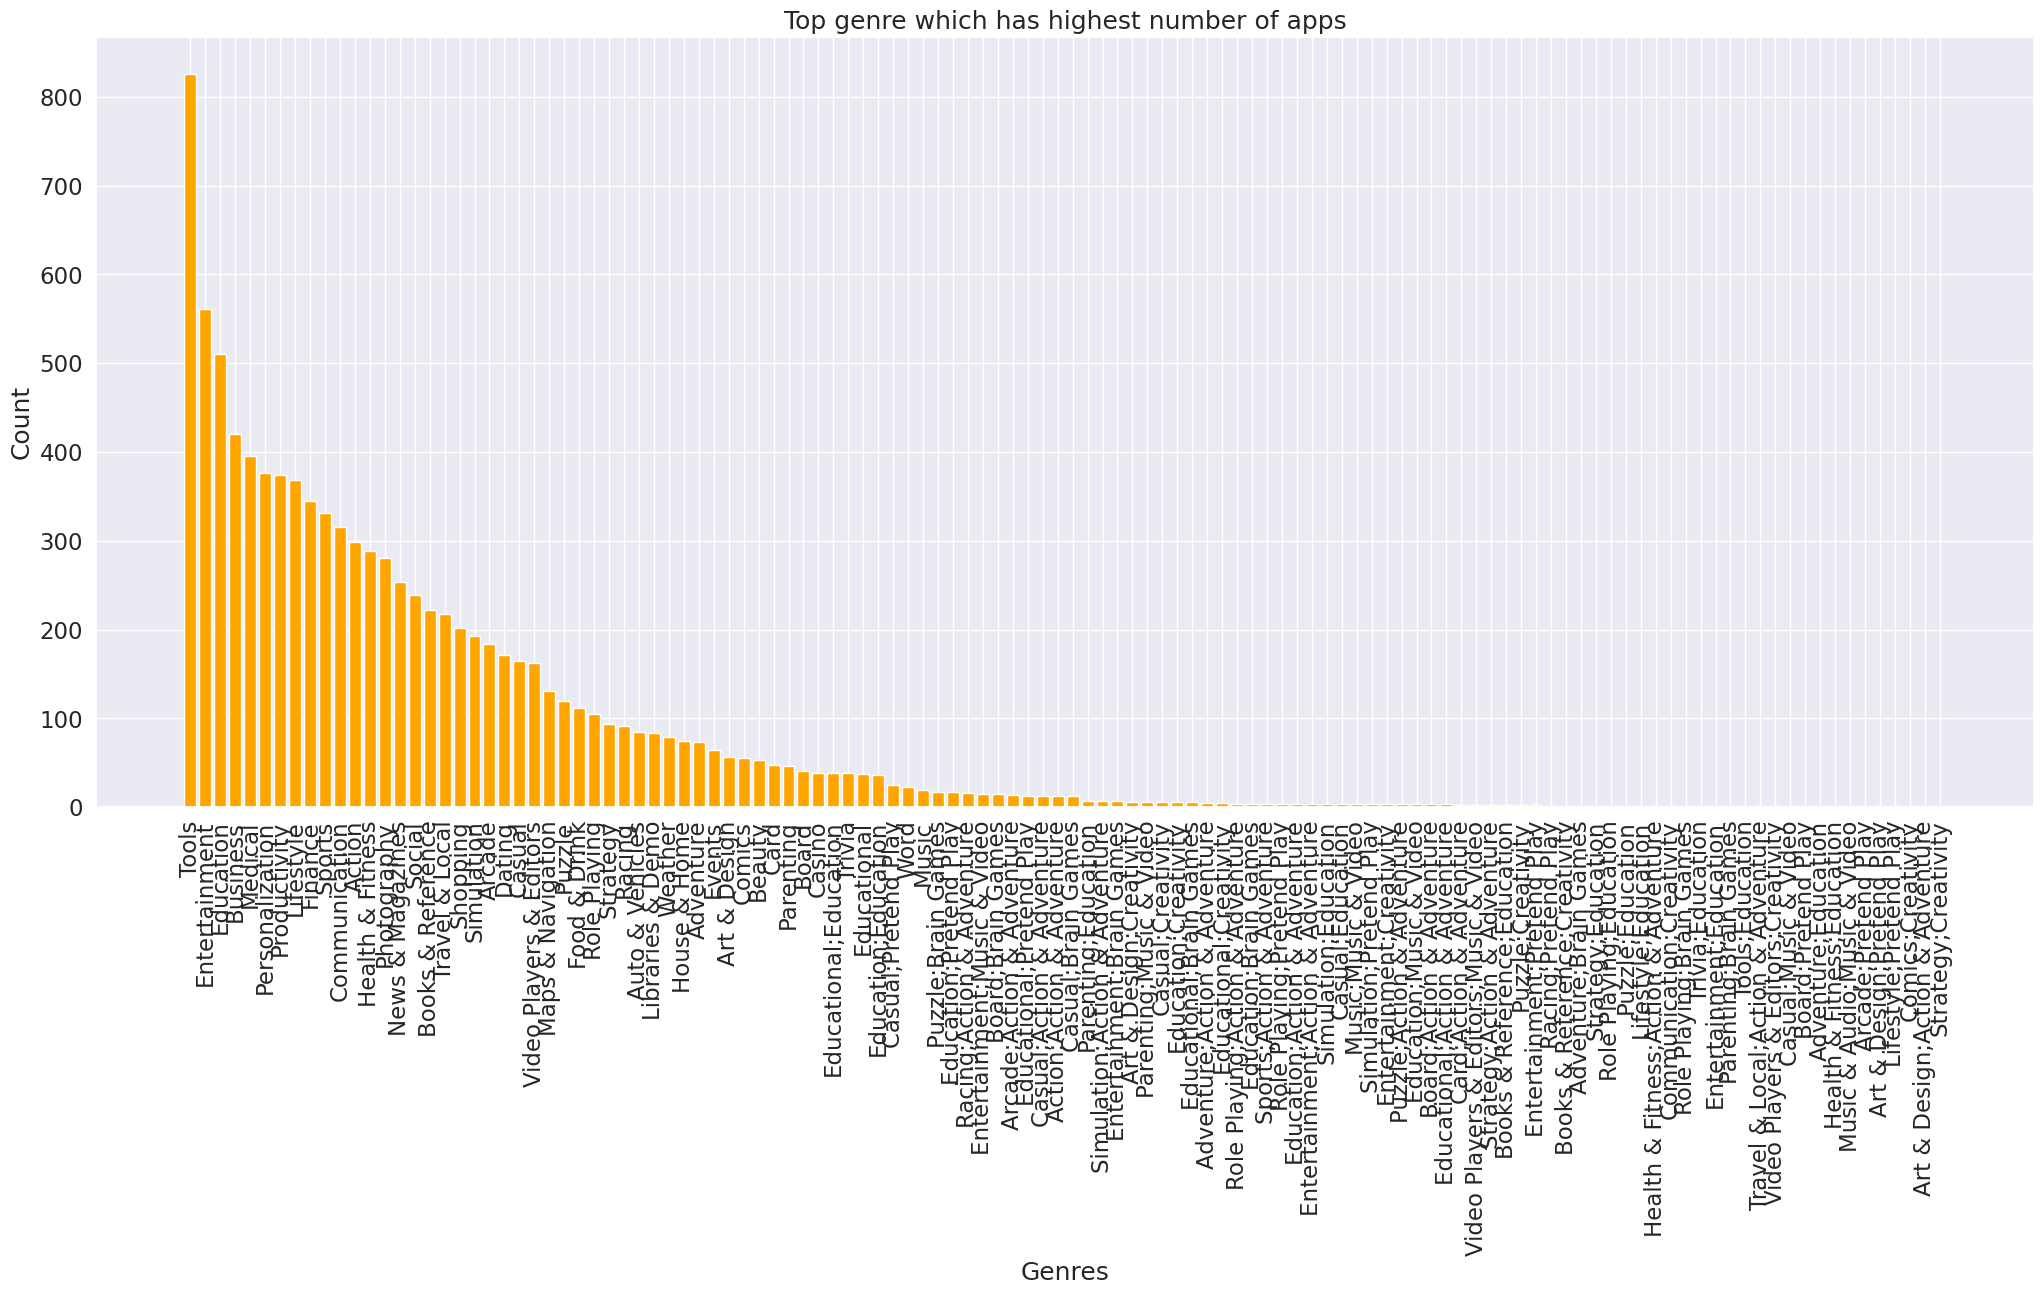

In [90]:
# top genre
plt.figure(figsize=(25,10)) 
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title('Top genre which has highest number of apps')
plt.xticks(rotation=90)
y = play_store_data['Genres'].value_counts()
x =  play_store_data['Genres'].value_counts().index
plt.bar(x,y, color = 'orange')

In [91]:
play_store_data.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


<ipython-input-92-ff1a597b0b3c>:4: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=play_store_data['Size'], y=play_store_data['Rating'], hue=play_store_data['Content Rating'], palette=custom_palette, s=50)


<Axes: xlabel='Size', ylabel='Rating'>

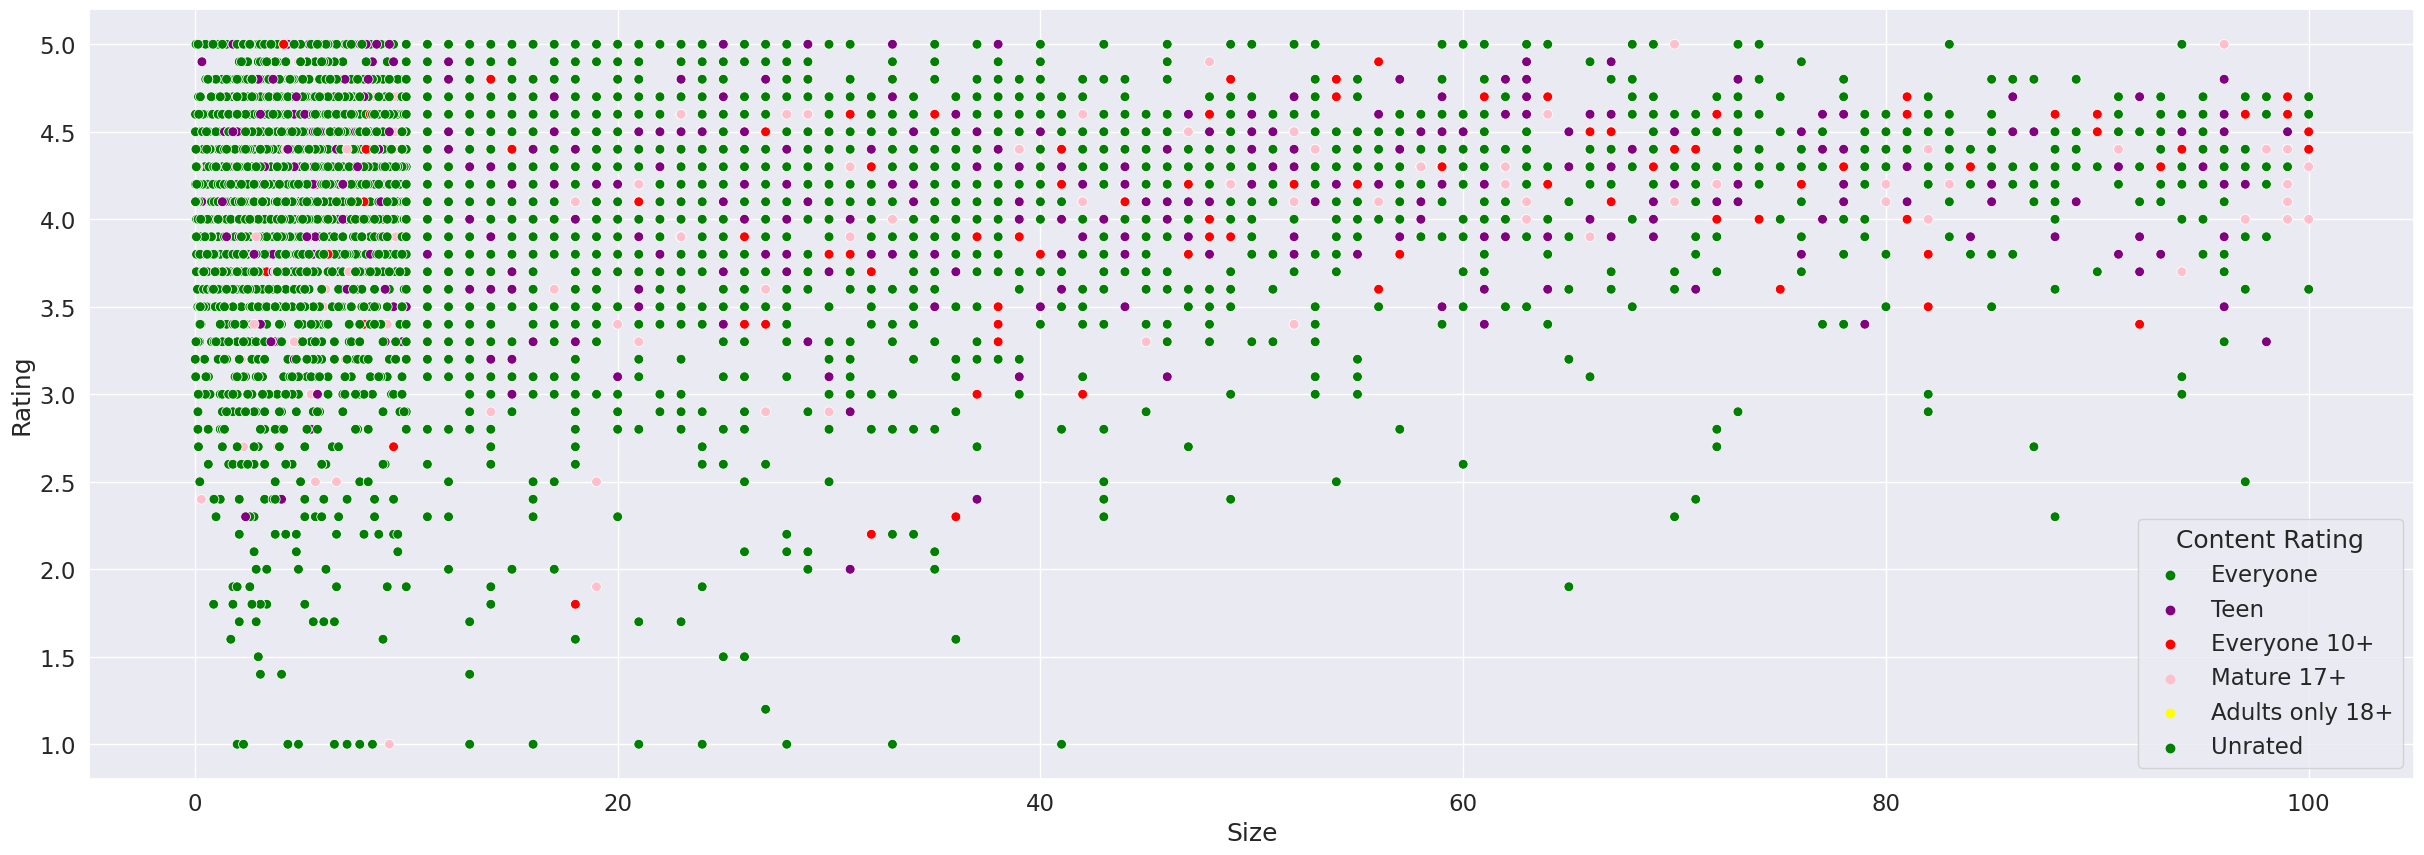

In [92]:
plt.figure(figsize=(30, 10))
custom_palette = ["green", "purple", "red", "pink", "yellow"]
sns.set(font_scale=1.5)
sns.scatterplot(x=play_store_data['Size'], y=play_store_data['Rating'], hue=play_store_data['Content Rating'], palette=custom_palette, s=50)


<Axes: xlabel='Size', ylabel='Rating'>

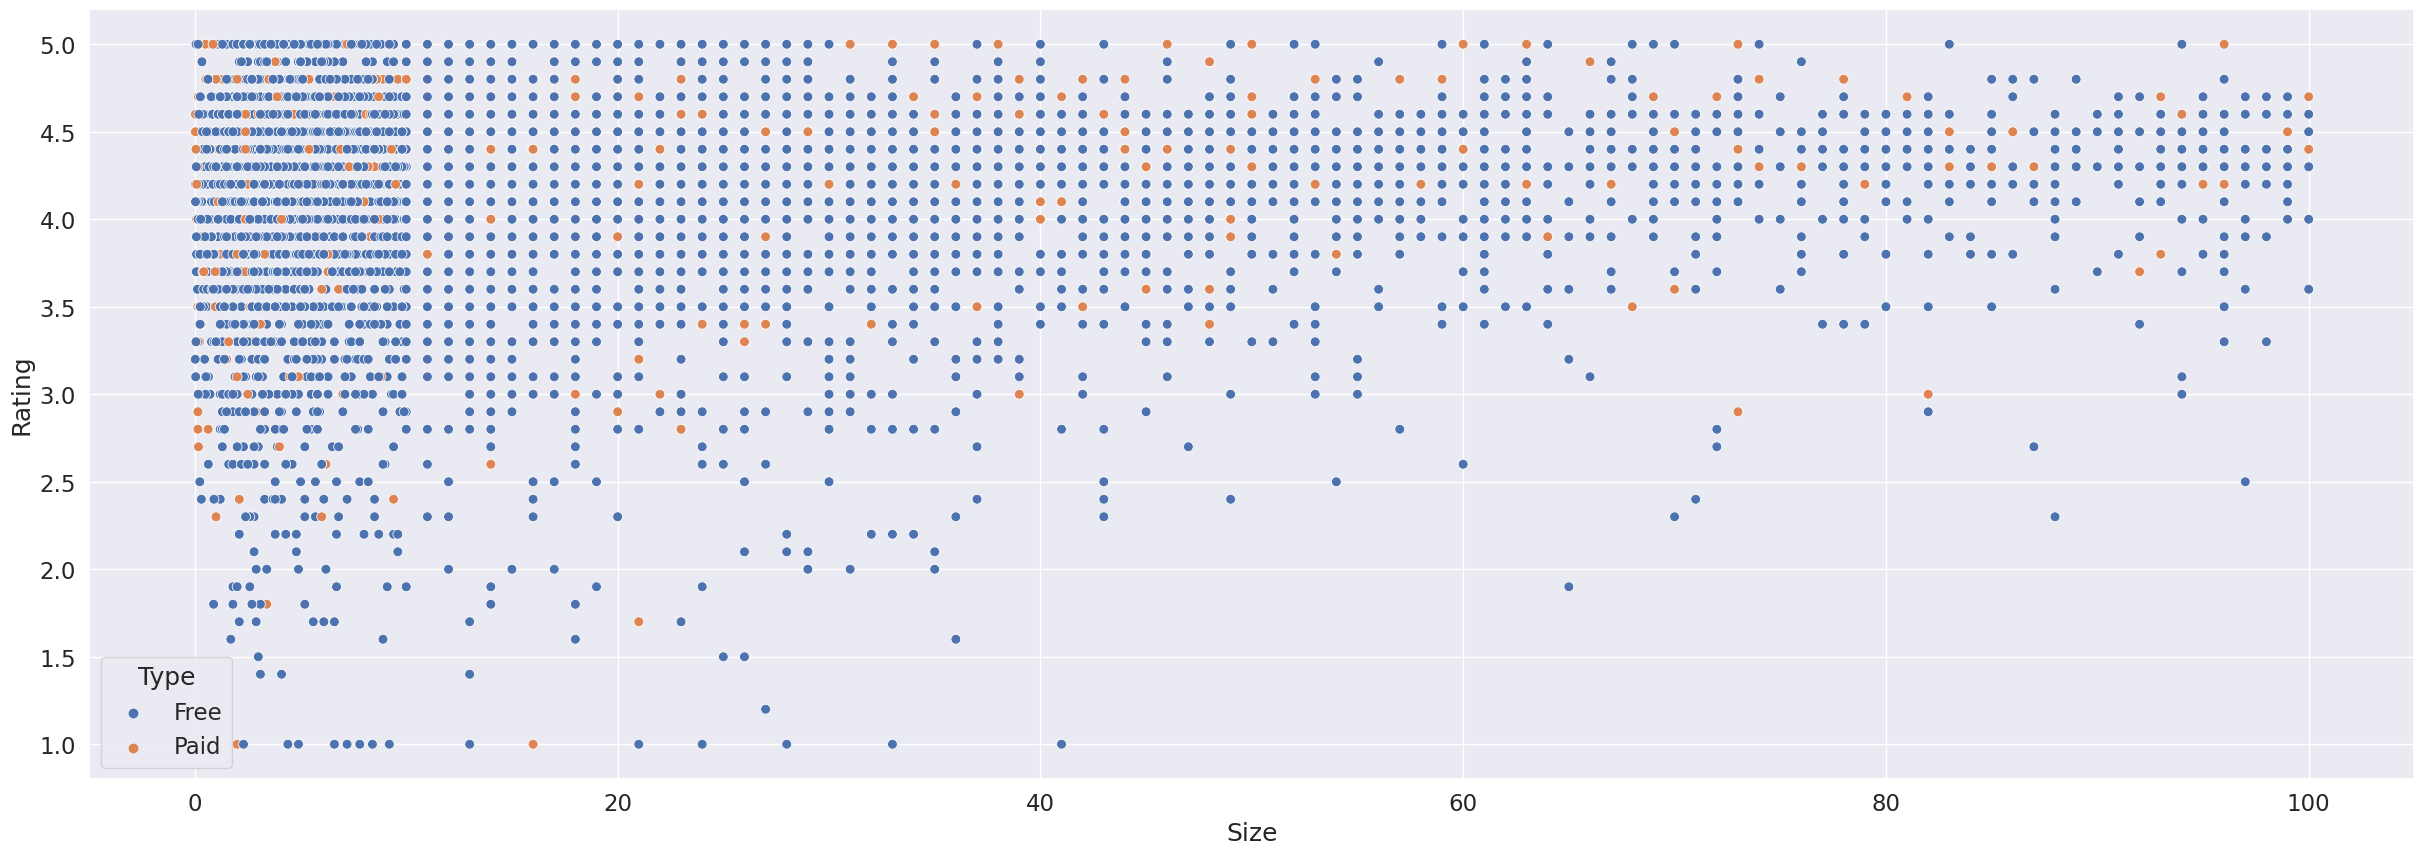

In [93]:
plt.figure(figsize=(30, 10))
sns.scatterplot(x = play_store_data['Size'], y = play_store_data['Rating'], hue=play_store_data['Type'], s=50)

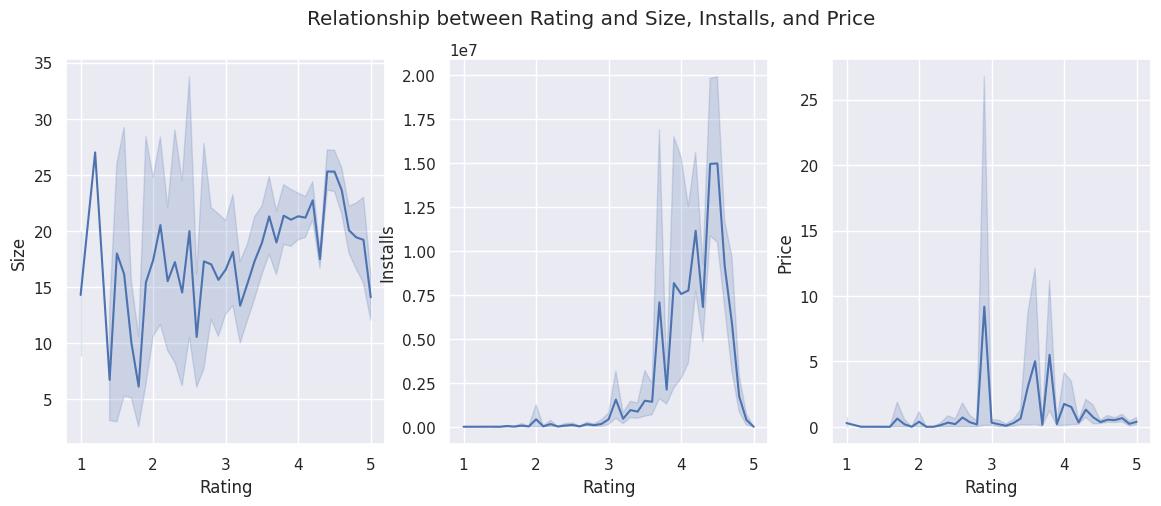

In [106]:
# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

# Create line plot for Size column
sns.lineplot(data=play_store_data, x="Rating", y="Size", ax=axs[0])
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Size")

# Create line plot for Installs column
sns.lineplot(data=play_store_data, x="Rating", y="Installs", ax=axs[1])
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Installs")

# Create line plot for Price column 
sns.lineplot(data=play_store_data, x="Rating", y="Price", ax=axs[2])
axs[2].set_xlabel("Rating")
axs[2].set_ylabel("Price")

# Add title for the whole plot
fig.suptitle("Relationship between Rating with Size, Installs and Price")

# Show the plot
plt.show()


In [95]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'Review Sentiments')

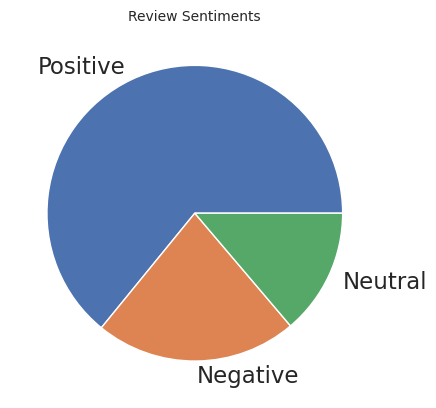

In [96]:
labels = user_reviews['Sentiment'].value_counts(sort =  True).index
sizes = user_reviews['Sentiment'].value_counts(sort = True)
plt.pie(sizes, labels=labels)
plt.title('Review Sentiments', fontsize = 10)

In [97]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [98]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [99]:
# Merging two dataframe 
merged_df = pd.merge(play_store_data, user_reviews, on='App')

In [100]:
merged_df.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love colors inspyering,Positive,0.500,0.600000


In [101]:
merged_df.describe()

,Rating,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,61556.000000,41150.000000,6.155600e+04,61556.000000,35934.000000,35934.000000
mean,4.296463,29.188271,4.552088e+07,0.149478,0.180879,0.493698
std,0.310503,25.897138,1.527484e+08,1.676713,0.350062,0.258100
min,2.500000,0.008500,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.200000,8.700000,1.000000e+06,0.000000,0.000000,0.361111
50%,4.300000,20.000000,5.000000e+06,0.000000,0.150000,0.514835
75%,4.500000,45.000000,1.000000e+07,0.000000,0.400000,0.650000
max,4.900000,99.000000,1.000000e+09,33.990000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation between colums of play store data and user reviews')

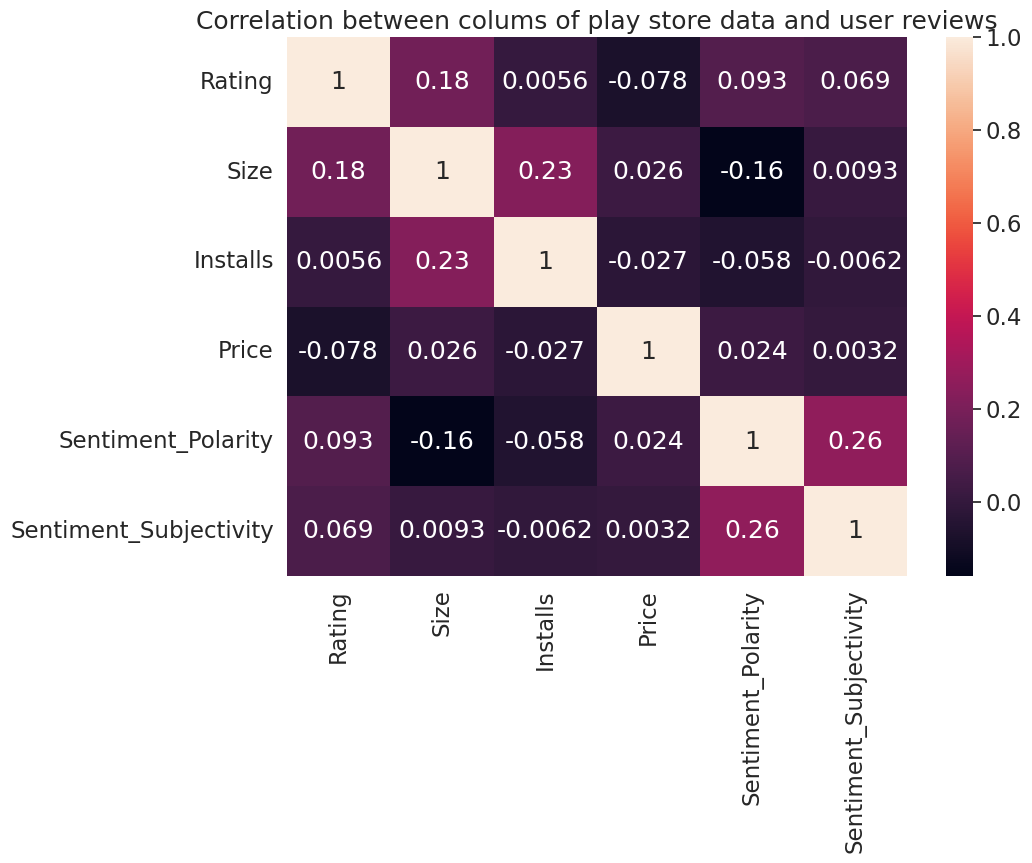

In [102]:
plt.figure(figsize = (10,7))
sns.heatmap(merged_df.corr(numeric_only=True),  annot = True)
plt.title('Correlation between colums of play store data and user reviews') 

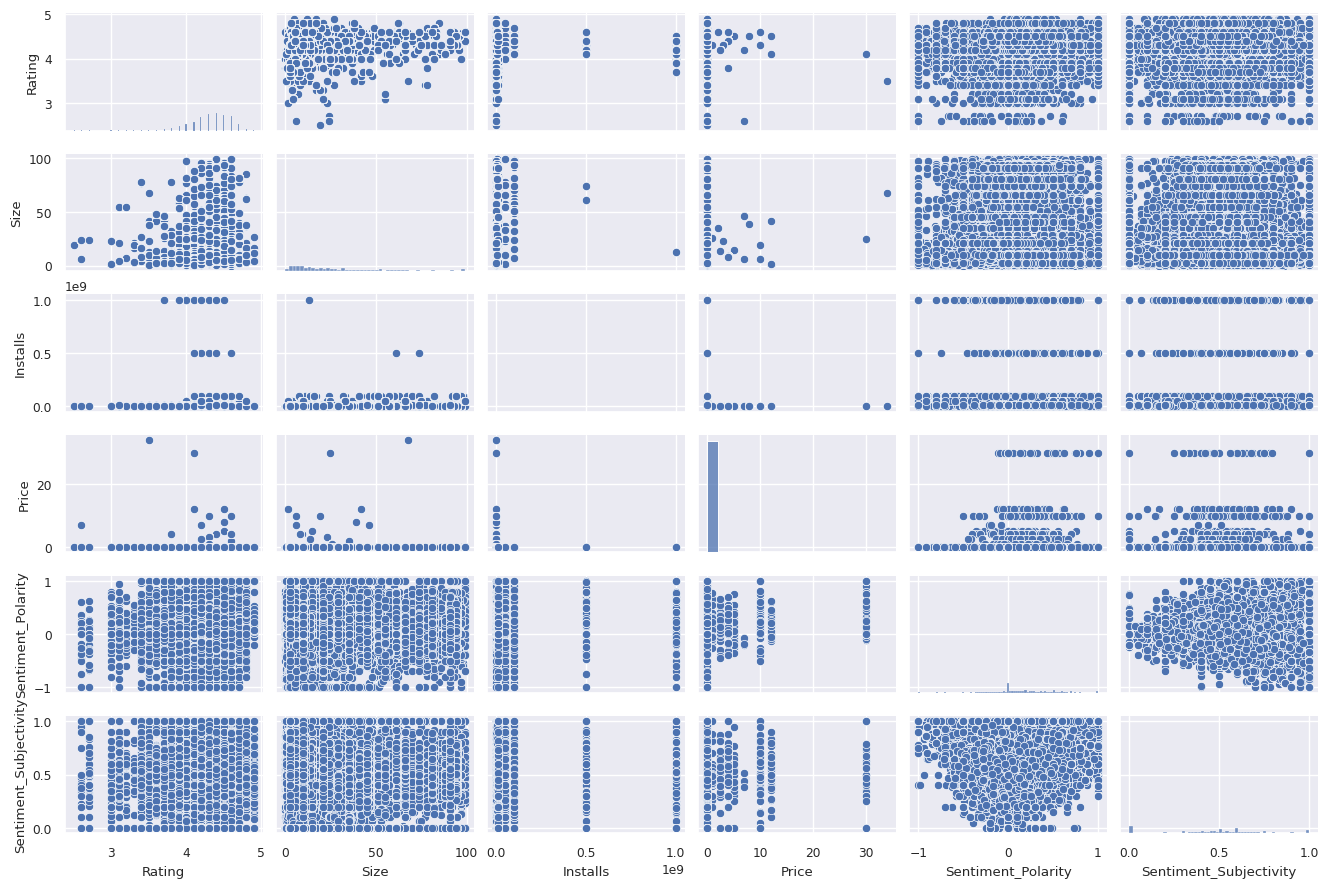

In [103]:
# set font scale
sns.set(font_scale=0.8)

# create pairplot
sns.pairplot(merged_df, height=1.5, aspect=1.5)

# reset font scale to default
sns.set(font_scale=1)

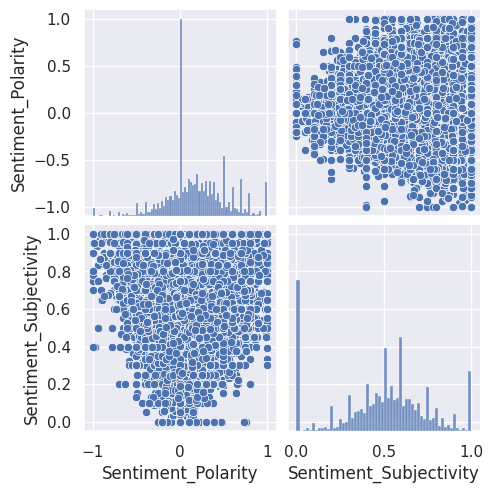

In [104]:
# Pair Plot 
sns.pairplot(user_reviews)